In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
X = pd.read_csv('./intermediate_results/X.csv')

In [8]:
y = X['worldwide_gross']
X = X.drop('Unnamed: 0',axis=1).drop('worldwide_gross', axis=1)

In [9]:
X.columns

Index(['production_budget', 'title_year', 'aspect_ratio', 'duration',
       'cast_total_facebook_likes', 'budget', 'imdb_score'],
      dtype='object')

In [10]:
from sklearn.linear_model import Lasso

model = Lasso()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X,y, random_state= 1)

In [13]:
model.fit(X_train,y_train)

/home/gersonp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0071909609533809e+18, tolerance: 8151656549558385.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
model.score(X_test,y_test) # Checking Lasso model as it had already done

0.5701369838292385

In [19]:
model.coef_ # checking coefficients of the modelo to see which variable is giving more information

array([ 2.95237593e+00, -7.84756567e+04, -7.90493920e+06, -2.76548618e+04,
        7.36281759e+01, -3.35812706e-02,  2.52128414e+07])

In [20]:
var = np.floor(np.log10(np.abs(model.coef_)))
var # here it can be seen the amount of information that every varaible is giving related to its magnitude

array([ 0.,  4.,  6.,  4.,  1., -2.,  7.])

([<matplotlib.axis.XTick at 0x7fdd403eb4a8>,
 <a list of 7 Text xticklabel objects>)

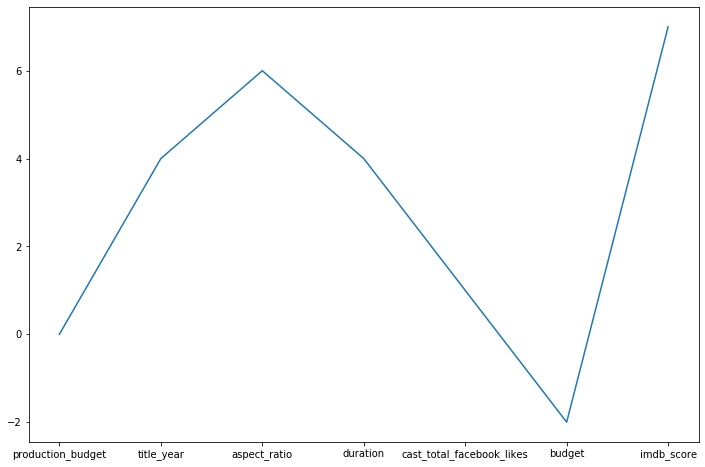

In [21]:
plt.rcParams['figure.figsize']= [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns)) # Plotting the relation of the magnitudes

# Correlation between variables

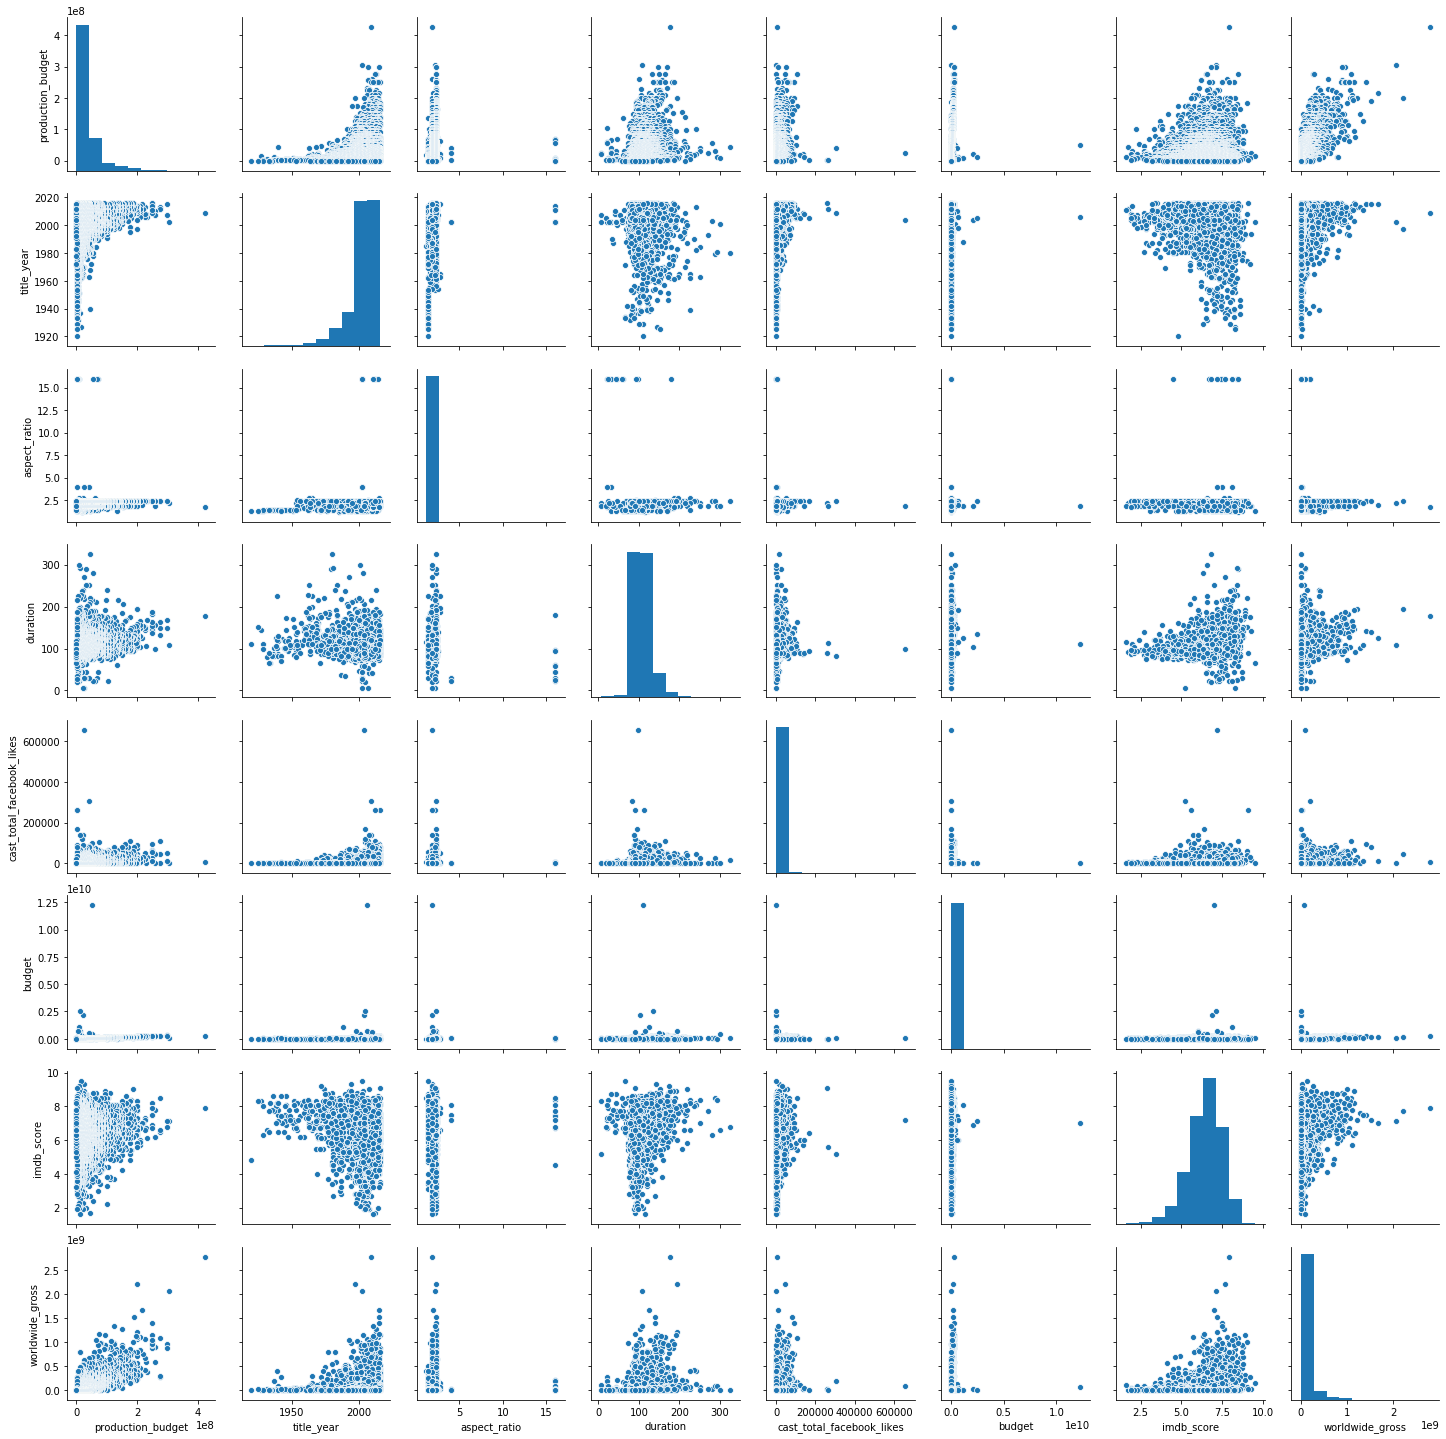

In [22]:
import seaborn as sns

z = pd.concat([X,y],axis=1)
sns.pairplot(z) # Pairing all the variables, variables do not seem to have any pattern

In [24]:
classf = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 =pd.concat([X,classf],axis=1)
Z2.head() # making classes with de production budget to get another feature

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,5


/home/gersonp/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/gersonp/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gersonp/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/gersonp/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


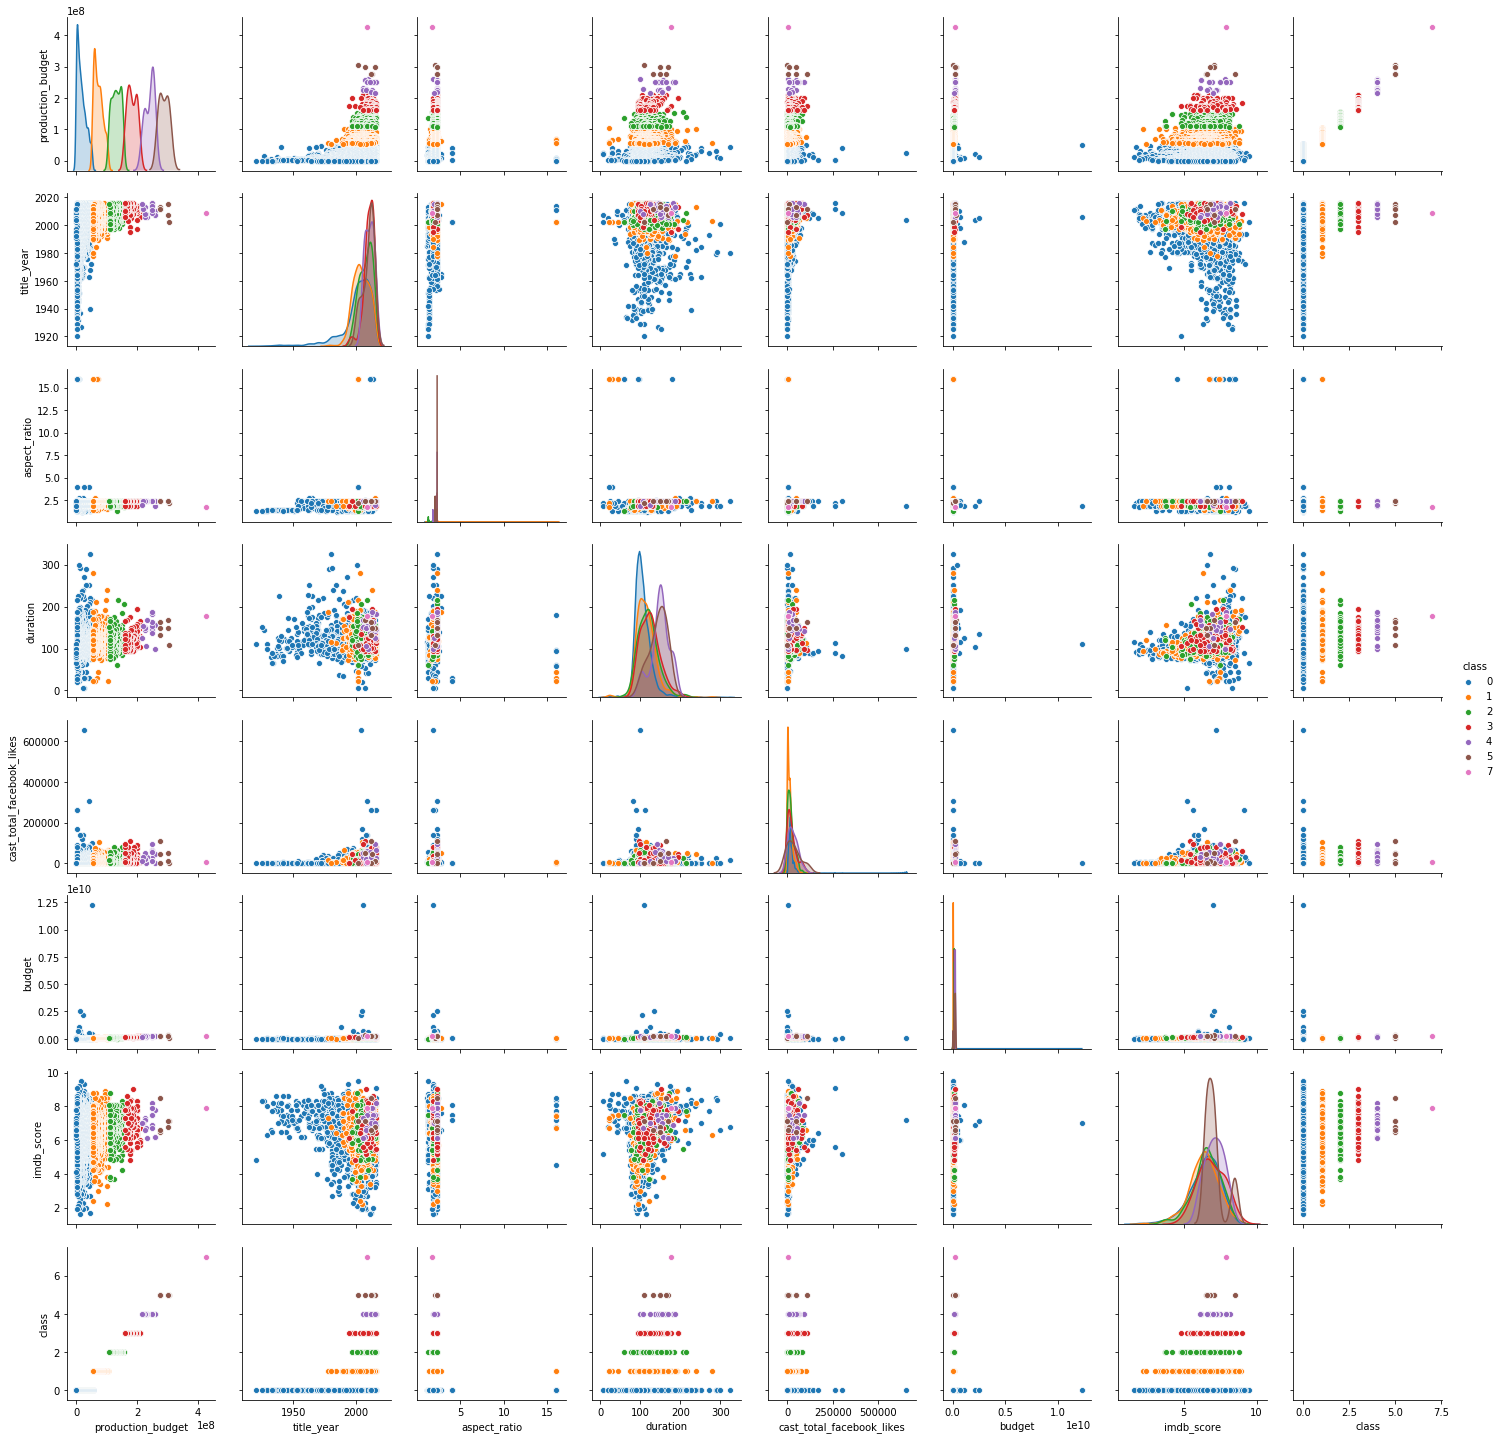

In [25]:
sns.pairplot(Z2, hue='class') # Paring the variables adding the classification of the budget as the color

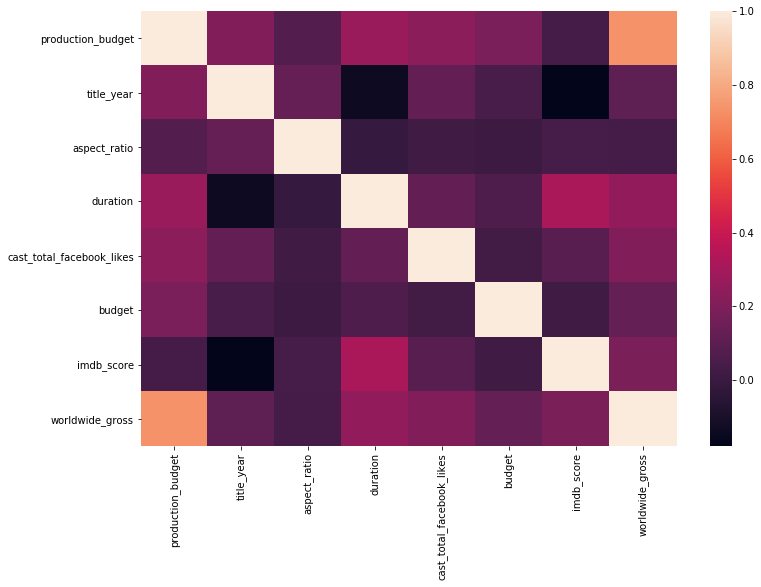

In [27]:
Z3 = pd.concat([X,y],axis = 1)
sns.heatmap(Z3.corr()) # analyzing correlations between variables, none seems to have a good relation
#it may be needed to look for more information

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [29]:
selector = SelectKBest(mutual_info_regression, k = 4)
selector.fit(X,y)
# Looking for the features that could help more to the model

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7fdd31f89730>)

In [30]:
scores = selector.scores_
scores
#result of the features

array([0.42995325, 0.06323062, 0.07299116, 0.07247195, 0.11789322,
       0.37579736, 0.04652126])

([<matplotlib.axis.XTick at 0x7fdd31eda4a8>,
 <a list of 7 Text xticklabel objects>)

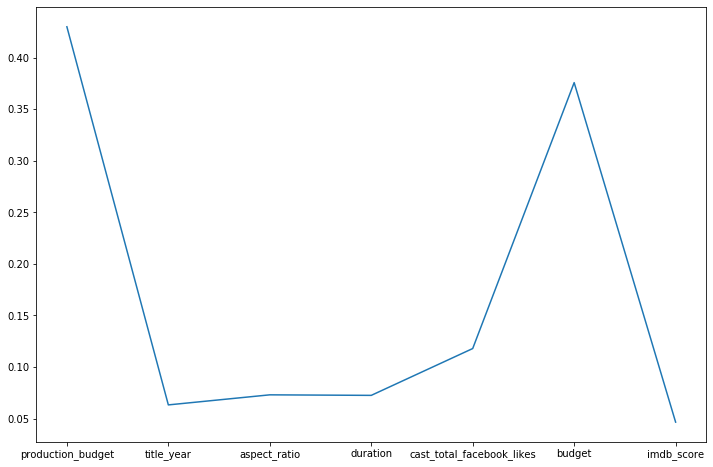

In [31]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns))
# contribution of the features to the model

From a univariant analysis it can be seen tha the best features are:
* produccion_budget
* cast_total_facebook_likes
* budget

# Results with new features

In [35]:
X2= X[['production_budget', 'title_year','duration',
       'cast_total_facebook_likes']]
X3= X[['production_budget','cast_total_facebook_likes','imdb_score']]

In [36]:
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=1)

In [38]:
cols2 = ['production_budget', 'title_year','duration',
       'cast_total_facebook_likes']
X2_train, X2_test, y2_train,y2_test = X_train[cols2],X_test[cols2],y_train,y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train,y3_test = X_train[cols3],X_test[cols3],y_train,y_test

In [39]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

/home/gersonp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.910125902020035e+18, tolerance: 9025872281883428.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))
# The selection of the features did not improve the model, let's check more options

0.5731124344715528
0.5404847138062298
0.5734571273980895
